In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data=pd.read_csv(r"../data/data.csv")

In [58]:
data=data.dropna(axis=1)

In [63]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_e'],
      dtype='object')

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


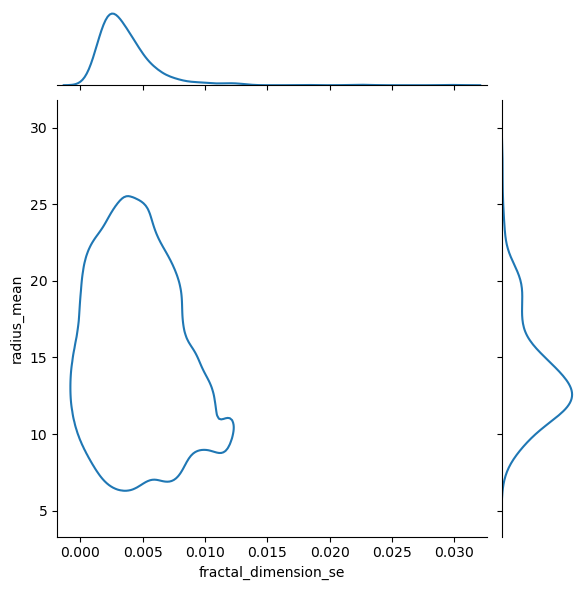

In [17]:
sns.jointplot(data['fractal_dimension_se'],data['radius_mean'],kind='kde',levels=1)
plt.show()

# Calculating Log Likelihoods of Each Variable

In [20]:

pd.DataFrame(data).describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [43]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import scale
import statsmodels.api as sm
import scipy.stats

 margin

In [79]:
data['constant'] = 1

In [80]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_e',
       'radius_mean_sq', 'texture_mean_sq', 'perimeter_mean_sq',
       'area_mean_sq', 'smoothness_mean_sq', 'compactness_mean_sq',
       'concavity_mean_sq', 'concave points_mean_sq', 'symmetry_mean_sq',
       'fractal_dimension_mean_sq', 'radius_se_sq', 'texture_se_sq',
       'perimeter_se_sq', 'area_se_sq', 'smoothness_se_sq',
       'compactness_se

In [36]:
from collections import OrderedDict

In [38]:
summaries = OrderedDict((
    ('symmetry_worst', 'mean'),
    ('fractal_dimension_worst', 'mean'),
    ('concave points_worst', 'mean'),
    ('concavity_worst', 'mean'),
    ('compactness_worst', 'mean'),
    ('smoothness_worst', 'mean'),
    ('area_worst', 'mean'),
    ('perimeter_worst', 'mean'),
    ('texture_worst', 'mean'),
    ('radius_worst', 'mean'),
    ('fractal_dimension_se', 'mean'),
    ('symmetry_se', 'mean'),
    ('concave points_se', 'mean'),
    ('concavity_se', 'mean'),
    ('compactness_se', 'mean'),
    ('smoothness_se', 'mean'),
    ('area_se', 'mean'),
    ('perimeter_se', 'mean'),
    ('texture_se', 'mean'),
    ('radius_se', 'mean'),
    ('fractal_dimension_mean', 'mean'),
    ('fractal_dimension_se', 'mean'),
    ('symmetry_mean', 'mean'),
    ('concave points_mean', 'mean'),
    ('concavity_mean', 'mean'),
    ('compactness_mean', 'mean'),
    ('smoothness_mean', 'mean'),
    ('area_mean', 'mean'),
    ('perimeter_mean', 'mean'),
    ('texture_mean', 'mean'),
    ('radius_mean', 'mean'),
))
table = data.groupby('diagnosis').agg(summaries)
table.sort_index(ascending=False, inplace=True)
table = table.T

In [39]:
table.style.format("{:>0.1f}")

diagnosis,M,B
symmetry_worst,0.3,0.3
fractal_dimension_worst,0.1,0.1
concave points_worst,0.2,0.1
concavity_worst,0.5,0.2
compactness_worst,0.4,0.2
smoothness_worst,0.1,0.1
area_worst,1422.3,558.9
perimeter_worst,141.4,87.0
texture_worst,29.3,23.5
radius_worst,21.1,13.4


In [64]:
# recoding some variables
data['diagnosis_e'] = np.where(data['diagnosis'] == 2, 1, 0)
data['diagnosis_e']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: diagnosis_e, Length: 569, dtype: int32

The constant term prevents this overall bias by forcing the residual mean to equal zero. 
Imagine that you can move the regression line up or down to the point where the residual mean equals zero.
For example, if the regression produces residuals with a positive average, 
just move the line up until the mean equals zero.

In [67]:
#target feature
diag_targ = pd.get_dummies(data.diagnosis_e, prefix='diag')
#feature column
feature=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [68]:
# creating quadratic terms
for col in feature:
    data[col+'_sq'] = data[col] * data[col]

One approach to remove confounding using weights is Inverse probability weighting. 
Inverse probability weighting relies on building a logistic regression model to estimate the probability of the 
exposure observed for a particular person, and using the predicted probability as a weight in subsequent analyses.
The following function creates the denominators of the IP weights.

In [69]:
def logit_ip_f(y, X):
    """
    Create the f(y|X) part of IP weights
    from logistic regression
    
    Parameters
    ----------
    y : Pandas Series
    X : Pandas DataFrame
    
    Returns
    -------
    Numpy array of IP weights
    
    """
    model = sm.Logit(y, X)
    res = model.fit()
    weights = np.zeros(X.shape[0])
    weights[y == 1] = res.predict(X.loc[y == 1])
    weights[y == 0] = (1 - res.predict(X.loc[y == 0]))
    return weights

In [84]:
X_ip = data[[
    'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','constant'
]]
denoms = logit_ip_f(data.diagnosis_e, X_ip)
weights = 1 / denoms


In [85]:
ols = sm.OLS(data.diagnosis_e, X_ip) 
res = ols.fit()
#Create a simple linear model to get a confidence interval on weight difference.

In [86]:
res.summary()

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\statsmodels\regression\linear_model.py:1804: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            diagnosis_e   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 25 Aug 2021   Prob (F-statistic):                nan
Time:                        10:00:35   Log-Likelihood:                    inf
No. Observations:                 569   AIC:                              -inf
Df Residuals:                     538   BIC:                              -inf
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
radius_mean                      0          0        nan        nan           0           0
texture_mean                     0          0        nan        nan           0           0
perimeter_mean                   0          0        nan        nan           0           0
area_mean                        0          0        nan        nan           0           0
smoothness_mean                  0          0        nan        nan           0           0
compactness_mean                 0          0        nan        nan           0           0
concavity_mean                   0          0        nan        nan           0           0
concave points_mean              0          0        nan        nan           0           0
symmetry_mean                    0          0        nan        nan           0           0
fractal_dimension_mean           0          0        nan        nan           0           0
radius_se                        0          0        nan        nan           0           0
texture_se                       0          0        nan        nan           0           0
perimeter_se                     0          0        nan        nan           0           0
area_se                          0          0        nan        nan           0           0
smoothness_se                    0          0        nan        nan           0           0
compactness_se                   0          0        nan        nan           0           0
concavity_se                     0          0        nan        nan           0           0
concave points_se                0          0        nan        nan           0           0
symmetry_se                      0          0        nan        nan           0           0
fractal_dimension_se             0          0        nan        nan           0           0
radius_worst                     0          0        nan        nan           0           0
texture_worst                    0          0        nan        nan           0           0
perimeter_worst                  0          0        nan        nan           0           0
area_worst                       0          0        nan        nan           0           0
smoothness_worst                 0          0        nan        nan           0           0
compactness_worst                0          0        nan        nan           0           0
concavity_worst                  0          0        nan        nan           0           0
concave points_worst             0          0        nan        nan           0           0
symmetry_worst                   0          0        nan        nan           0           0
fractal_dimension_worst          0          0        nan        nan           0           0
constant                         0          0  

# The Standard Error of Our Estimates

UndefinedVariableError: name 'M' is not defined